In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

X[0] : [-1.67534104]
X_poly[0] : [-1.67534104  2.80676758]


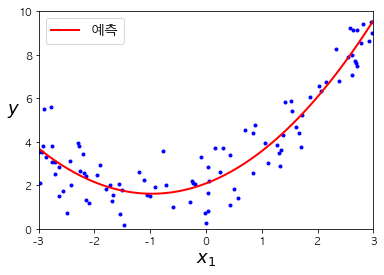

In [10]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print('X[0] :', X[0])
print('X_poly[0] :', X_poly[0])
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);
plt.show();

# 4.4 학습곡선
### 과대적합, 과소적합
#### 교차검증
- 과대적합: 훈련데이터 성능 좋지만, 교차 검증 점수가 나쁨
- 과소적합: 훈련데이터 성능과 교차 검증 점수 둘다 나쁨

#### 학습곡선
- 학습곡선: 훈련세트, 검증세트의 모델 성능을 훈련세트 크기(반복)의 함수로 표현
   - 훈련세트에서 크기가 다른 서브세트를 만들어 모델을 여러 번 훈련

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 모델의 학습 곡선을 그리는 함수 정의
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("훈련 세트 크기", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)  

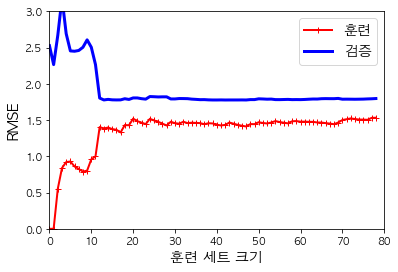

In [6]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()          

### 선형회귀 학습곡선 (과소적합)
#### 훈련데이터 성능
- 훈련세트에 한 두개의 샘플이 있을 때, 모델이 완벽히 작동
- 샘플이 추가 됨에 따라 오차가 계속 상승
    - 잡음과 비선형이 존재해 곡선이 평면이 될 때까지 상승
    
#### 검증데이터 성능
- 적은 수의 훔련 샘플로 훈련될 떄, 검증 오차가 큼
    - 일반화를 할 수 없기 때문
- 샘플이 추가 됨에 따라 오차가 감소
    - 하지만 선형 회귀의 직선은 제대로 모델링 할 수 없어 훈련세트의 그래프와 가까워짐

#### => 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 근접

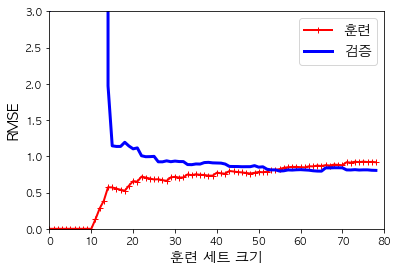

In [12]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                   

### 다항회귀 학습곡선 (과대적합)
- 훈련데이터의 오차가 선형회귀보다 낮음
- 두 곡선 사이 공간이 존재
     - 훈련데이터 모델 성능이 검증데이터에서보다 낫다
     - 더 큰 훈련 세트를 사용하면 두 곡선이 가까워짐
     
#### => 검증오차가 훈련오차에 근접할 때까지 훈련데이터를 추가

---
### 편향/분산 트레이드 오프
모델의 일반화 오차 = 세가지 다른 종류의 오차 합
- 편향
    - 잘못된 가정으로 발생 (2차를 선형으로)
    - 편향이 큰 모델은 과소적합되기 쉬움
    - 예측 값이 실제 데이터와 얼마나 떨어져있는지
- 분산
    - 훈련데이터의 작은 변동에 모델이 과도하게 민감하기에 발생
    - 자유도가 높은, 고차 다항회귀 모델이 높은 분산을 가지기 쉬움
    - 분산이 큰 모델은 과대적합되기 쉬움
    - 반복한 모델의 예측값이 얼마나 다양한지 (예측치 범위가 넓어 이상치도 예측에 포함돼 과대적합가능)
- 줄일 수 없는 
    - 데이터 자체의 잡음으로 발생
    - 데이터 자체의 오류를 해결, 이상치 감지해 제거

편향은 데이터 값에서 얼마나 떨어져있는지, 분산은 예측치들의 평균으로부터 얼마나 떨어져있는지
#### => 모델의 복잡도 &uarr; , 분산 &uarr; 편향 &darr;
 

# 4.5 규제가 있는 선형모델
과대적합 감소시키는 가장 좋은 방법 &rarr; 모델 규제 = 자유도 감소 = 다항식의 차수 감소

## 4.5.1 릿지 회귀
규제가 추가된 선형 회귀 버전, 규제항 $\alpha\sum_{i=1}^{n}{\theta^2}$이 비용함수에 추가 <br><br>
따라서 모델(알고리즘)을 데이터에 적합 시키는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지 <br>
단, 규제항은 학습에만 사용되며 테스트 시에는 규제항이 사용되지 않는다
<br><br>

$$J(\theta) = MSE(\theta) +\alpha\sum_{i=1}^{n}{\theta^2}$$


- 하이퍼 파라미터 a: 모델을 얼마나 규제할지 조절
    - a=0: 릿지회귀 = 선형회귀
    - a&uarr;: 모든 가중치가 거의 0에 가까워지며 데이터의 평균을 지나는 수평선<br>
- 편향 $\theta_{0}$는 규제되지 않음 
- w를 특성의 가중치 벡터($\theta_{1} 에서 \theta_{n}$)라고 하면, 규제항 = $\frac{1}{2}(\|w\|_{2})^2$ 
    - 경사하강법 적용 시, MSE 그레이디언트 벡터 + $\alpha w$  <br><br>

릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 데이터 스케일을 맞춰주는것이 중요하다.

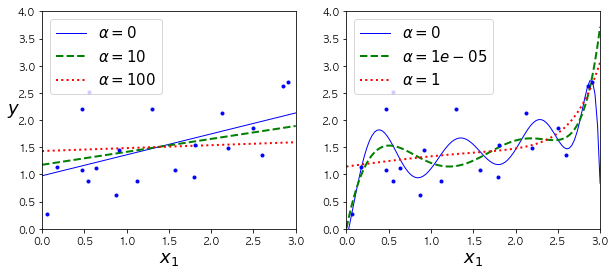

In [13]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

### 릿지 모델 훈련 결과
- 왼쪽 그래프: 평범한 릿지모델 사용해 선형적인 예측
- 오른쪽 그래프: PolynominalFeature(degree=10)을 사용해 데이터 확장 후 standardscaler로 스케일 조정 후 릿지모델 적용

=> a &uarr; 직선에 가까워짐<br>
즉, 모델의 분산이 줄지만 편향은 커짐
<br><br>

---
### 릿지 회귀의 정규방정식
$$\hat{\theta} = (X^{T}X + \alpha A)^{-1}X^{T}y$$


---
### 사이킷런에서 정규방정식 적용

In [14]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

### 확률적 경사 하강법 사용
SGDRegressor()에서 penalty인자는 사용할 규제를 정의하는 인자이다. l2는 릿지 회귀를 의미한다.

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

## 4.5.2 라쏘 회귀
규제가 추가된 선형 회귀 버전, 규제항 $\alpha\sum_{i=1}^{n}{|\theta_{i}|}$이 비용함수에 추가 <br><br>


$$J(\theta) = MSE(\theta) +\alpha\sum_{i=1}^{n}{|\theta_{i}|}$$
- 규제항 = 가중치 벡터의 $L_{1}$ 노름을 사용

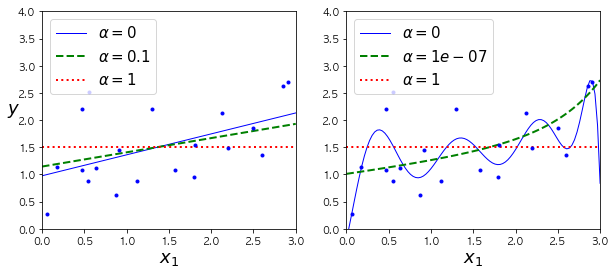

In [16]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

### 라쏘 모델 훈련 결과
- 왼쪽 그래프: 라쏘모델 사용한 선형 회귀
- 오른쪽 그래프: 라쏘모델 사용한 다항 회귀

=> 라쏘 회귀의 중요한 특징은 상대적으로 덜 중요한 특성의 가중치를 0으로 만든다  
즉, 라쏘 회귀는 모델에 필요한 특성을 선택하여 희소 모델(sparse model)을 만든다

---
### 사이킷런에서 라쏘 회귀

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### 경사 하강법 사용
SGDRegressor()에서 penalty인자는 사용할 규제를 정의하는 인자이다. l1는 라쏘 회귀를 의미한다.

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=27, penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

---
### Lasso vs Ridge

In [19]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# 편향은 무시
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

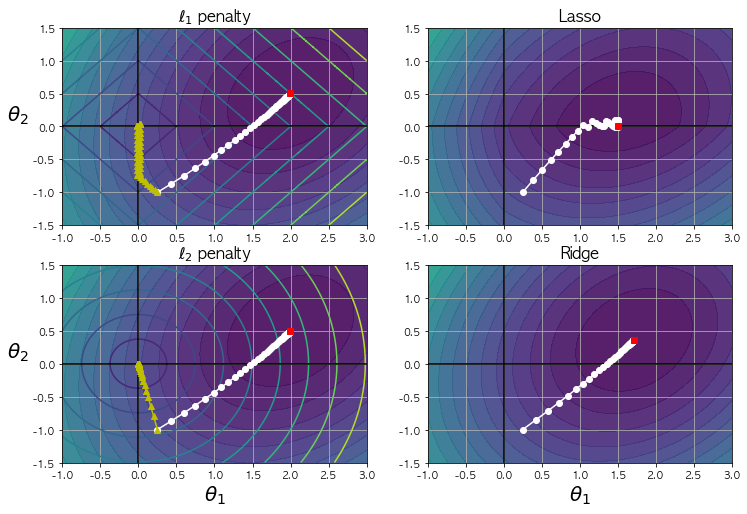

In [20]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

#### 라쏘회귀
- $\theta_{2}$가 먼저 0에 도달한 뒤 $\theta_{1}=0$에 도달할 때까지 축을 따라감
- $\theta_{2}$=0으로 빠르게 줄고, 축을 따라 진동하면서 최적점에 도착
-a &uarr;, 전역 최적점이 노란 점을 따라 왼쪽으로 이동 (축을 따라) 

#### 릿지회귀
- 원점까지 직선 경로를 따라감
- $\theta_{2}$가 최적점에 가까워질수록 그레이디언트가 작아짐
    - 경사 하강법이 자동으로 느려지며 수렴에 도움(진동이 없음)
- a &uarr;, 전역 최적점이 원점에 가까워짐

---
## 4.5.2 엘라스틱넷
릿지회귀와 라쏘회귀의 절충 모델, 규제항 = 릿지모델과 라쏘모델을 더함<br><br>


$$J(\theta) = MSE(\theta) +r\alpha\sum_{i=1}^{n}{|\theta_{i}|} + \frac{1-r}{2}\alpha\sum_{i=1}^{n}{\theta_{i}^2}$$
- 혼합 비율 = r
    - r=0, 엘라스틱넷 = 릿지회귀
    - r=1, 엘라스틱넷 = 라쏘회귀
    
### 규제 사용
- 평범한 선형 회귀에선 사용 X
- 릿지가 기본, 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷 사용
    - 특성 수 > 훈련 샘플 수 , 특성 몇 개가 강하게 연관 &rarr; 엘라스틱넷 선호

---
### 사이킷런에서 라쏘 회귀

In [21]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

---
## 4.5.4 조기 종료
규제의 또다른 방법으로 경사하강법 같은 반복 학습 알고리즘에서 검증 에러가 최솟값에 도달하면 바로 훈련을 중단

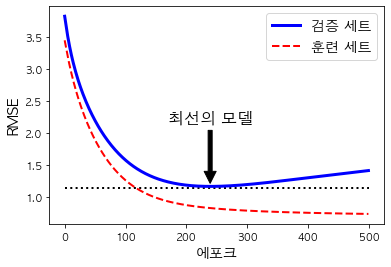

In [22]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('최선의 모델',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="훈련 세트")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("에포크", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

---
# 4.5 로지스틱 회귀
샘플이 특정 클래스에 속할 확률을 추정 (이진 분류기)

## 4.6.1 확률 추정
$$\hat{p} = h_{\theta}(x)=\sigma(\theta^{T}x)$$
- $\sigma()$ : 로지스틱 함수이며, 0과 1사이의 값을 출력하는 시그모이드 함수
$$\sigma(t) = \frac{1}{1+ exp(-t)}$$

### 로지스틱 회귀모델 예측
$$\hat{y} = \begin{cases} 0 \quad \hat{p} < 0.5 \\ 1 \quad \hat{p} \ge 0.5 \end{cases}$$
- $\theta^{T}x$ 양수, 양성클래스 1로 예측
- $\theta^{T}x$ 음수, 음성클래스 0으로 예측
    
## 4.6.2 훈련과 비용 함수
#### 하나의 훈련 샘플에 대한 비용함수
$$c(\theta) = \begin{cases} -log(\hat{p}) \quad   y = 1 \\ -log(1-\hat{p}) \quad y = 0 \end{cases}$$
<br>
- t &rarr; 0, $-log(t)$가 매우 커짐
    - 양성 샘플을 0에 가까운 확률로 추정하면, 비용이 크게 증가
    - 음성 샘플을 1에 가까운 확률로 추정하면, 비용이 크게 증가
<br><br>
- t &rarr; 1, $-log(t)$ &rarr; 0
    - 양성 샘플을 1에 가까운 확률로 추정하면, 비용은 0에 가까워짐
    - 음성 샘플을 0에 가까운 확률로 추정하면, 비용은 0에 가까워짐
    
### 전체 훈련세트에 대한 비용함수
전체 훈련세트에 대한 비용함수는 모든 데이터에 대한 비용의 평균이며, 이것을 로그 손실(log loss)라고 한다
$$J(\theta) = \frac{-1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{y^{(i)}}) + (1-y^{(i)})log(1-\hat{p^{(i)}})]$$
- 비용함수가 볼록 함수이므로 경사하강법 이용해 전역 최솟값 찾음 

#### 편미분
각 샘플에 대해 예측 오차 계산 후, j번째 특성 값을 곱해 모든 훈련 샘플에 대해 평균을 구함
$$\dfrac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^{T}x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

## 4.6.3 결정 경계
iris(붓꽃) 데이터 셋을 이용

- sepal length: 꽃받침 길이
- sepal width: 꽃받침 너비
- petal length: 꽃잎 길이
- petal width: 꽃잎 너비

![nn](https://raw.githubusercontent.com/minsuk-sung/Hands-On-MachineLearning/24db9c45ebb98500669c4f2a03ece6e02c28061f/Chap04-모델%20훈련/images/iris.png)

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [24]:
import pandas as pd
iris_df = pd.DataFrame(iris['data'], columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
X = iris['data'][:, 3:] # 꽃잎의 너비 
y = (iris['target']==2).astype(int) # Virginica이면 1, 아니면 0 

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

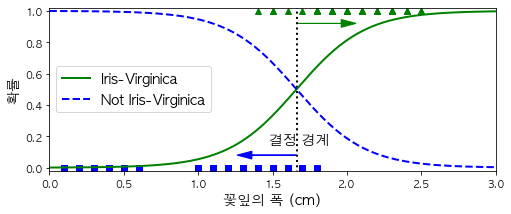

In [27]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # 꽃잎의 너비가 0~3인 꽃 생성 (열벡터)
y_proba = log_reg.predict_proba(X_new)  # 확률추정
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]  # 결정경계
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "결정 경계", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("꽃잎의 폭 (cm)", fontsize=14)
plt.ylabel("확률", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

predict_proba는 $\hat{p}$ 확률을 반환  
predict는 가장 가능성 높은 클래스를 반환

In [28]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Petal width, Petal length를 이용한 Verginca 분류기 구현

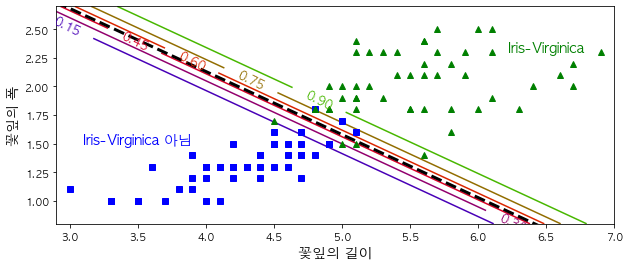

In [29]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Iris-Virginica 아님", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

- 결정경계 선형 : $\theta_{0} + \theta_{1}x_{1} + \theta_{2}x{2} = 0$을 만족하는 $(x_{1}, x_{2})$의 집합  

---
#### 모델 규제
하이퍼 파라미터 C = 모델의 역수로, C가 높을 수록 모델의 규제 감소

---
## 4.6.4 소프트맥스 회귀 (다항 로지스틱 회귀)
다중 클래스를 지원하도록 일반화  

데이터 x가 주어지면 각 클래스 k에 대한 점수 $s_{k}(x)$를 계산하고, 
그 점수값에 소프트맥스 함수를 적용해 각 클래스의 확률을 예측하는 모델
#### 클래스 k에 대한 소프트맥스 점수 
$$s_{k}({x}) = (\theta^{(k)})^{T}x$$
   - 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 존재
   - 파라미터 행렬 $\Theta$에 행으로 저장

### 확률추정
$$\hat{p}_{k} = \sigma(s(x))_{k}=\frac{exp(s_{k}({x}))}{\sum_{j=1}^{K}exp(s_{j}({x}))}$$
   - K: 클래스 수
   - s(x): 샘플 x에 대한 각 클래스의 점수를 담은 벡터
   - $\sigma(s(x))_{k}$: 샘플 x에 대한 각 클래스 점수가 주어졌을 때, 이 샘플이 클래스 k에 속할 추정확률
   
### 소프트맥스 회귀분류기의 예측

$$ \hat{y} = \underset {k} {argmax}\; \sigma(s(x))_{k} = \underset{k}{argmax}\;s_{k}({x})= \underset{k}{argmax}\;((\theta^{(k)})^{T}x)$$
   - $\sigma(s(x))_{k}$가 최대인 k 값을 반환
   
한 번에 하나의 클래스만 예측 (다중 클래스일 뿐, 다중 출력이 아님)  
상호배타적인 클래스에서만 사용  

### 훈련
#### 크로스 엔트로피 비용함수
- 타깃 클래스에 대해 높은 확률, 다른 클래스에 대해 낮음 확률 추정
$$ J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_{k}^{(i)}\log(\hat{p}_{k}^{(i)})$$
   - $y_{k}^{(i)}$: i번째 샘플이 클래스 k에 속할 타깃 확률
   - 크로스 엔트로피를 최소화하는 것은 타깃 클래스에 낮은 확률을 추정하는 모델을 억제
   
#### 클래스 k에 대한 크로스 엔트로피 그레이디언트 벡터
$$\bigtriangledown_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i=1}{m}(\hat{p}_{k}^{(i)} -{y}_{k}^{(i)})x^{(i)}$$
   - 비용함수를 최소화하기 위한 파라미터 행렬 $\Theta$를 찾기 위해 경사하강법 사용

### 사이킷런에서 소프트맥스 회귀
Scikit-Learn에서 LogisticRegression은 셋 이상의 다중 클래스 분류에서 기본적으로 일대다(OvA)를 사용    
multi_class인자를 multinomial로 설정하면 Softmax Regression을 사용 가능     
solver 인자에 lbfgs로 지정해야한다  

In [30]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

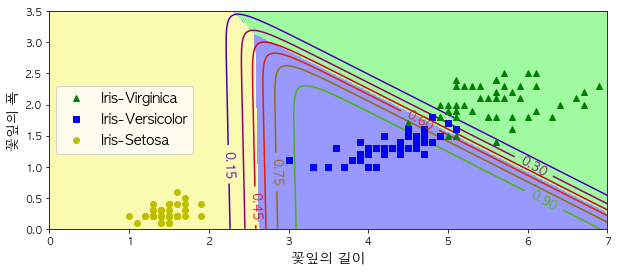

In [31]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

- 결정경계가 모두 선형
- 추정확률이 50% 이하인 클래스를 추정할 수 있음

In [32]:
softmax_reg.predict([[5, 2]])

array([2])

In [33]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])